In [ ]:
#default_exp datablock

# DataBlock

> process timeseries datasets with DataBloc

In [ ]:
#export
from torchtools.data import *
from torchtools.datasets import *

from torchtools.augmentations import *

from torchtools.models import *
from torchtools.core import *

In [ ]:
#export
from fastai2.data.all import *
from fastai2.basics import *

In [ ]:
#export
import pandas as pd
import numpy as np
from functools import partial

In [ ]:
_verbose=True

Using the standard fastai v2 Datablock API:
- provides all fastai v2 functionality
- seems to be significantly slower than using e.g. tsai NumpyDataLoader
- can be tweaked maybe?

### Get Data

In [ ]:
df_main = pd.read_csv('./data/custom/bi_sample_anon.csv', nrows=200000)

In [ ]:
## simple config
# standard config with all continuous xs and y
x_cols = [[f'x{i}_{j}' for j in range(10)] for i in range(6)]
dep = 'y0'
n_train = 8000

items is a list of (x,y) tuples  
methods called when passing items to DataBlock:
- DataBlock.datasets(items, ....)
- Dataset(items, ...)
- TfmdList(items, ...)
- L(items, ...)
- CollBase.__init__(items, ...)



`df_to_items` and `df_to_items_discrete`:
- fill in the nans
- zip together `(x,y)` resp. `(x_cont, x_dis, y)`
- return n_train for convenience, needed to split up data sometimes, e.g. for the ucr data
- list of tuples

Not ideal that some function names are used in different steps in similar, but not identical ways

Define inputs for DataBlock, we need:
- get_items: source to items
- get_x, get_y or getters: 
- blocks: provide type_tfms for the inputs basically
- splitter:

In [ ]:
def items_to_list(items):
    '''convert list of tuples to list of lists'''
    return list(map(list, items))

In [ ]:
items, _ = df_to_items(df_main, x_cols, dep, n_train)
items_l = items_to_list(items)
assert isinstance(items_l[0], list)

(200000, 6, 10)


In [ ]:
def get_items(df_main):
    '''
    get_items to be used with all continuous datablock
    '''
    return items_to_list(df_to_items(df_main, x_cols, dep, n_train)[0])

In [ ]:
# all-cont getters
def get_x(x):
    pv(f'get_x item {x}', verbose=_verbose)
    return x[0]
def get_y(x):
    pv(f'get_y item {x}', verbose=_verbose)
    return x[1]

In [ ]:
dblock = DataBlock(get_items=get_items, get_x=get_x, get_y=get_y, batch_tfms=RandAugment())

tfms None


In [ ]:
#cuda
dblock.summary(df_main)

Setting-up type transforms pipelines
0       2009-01-02 19:30:00  2.77   56.497175  109.890110   -7.843137   
1       2009-01-02 19:30:00  2.92   52.083333   98.039216 -161.290323   
2       2009-01-03 11:30:00  2.08   92.592593   92.592593  -50.761421   
3       2009-01-03 11:30:00  4.00   33.333333  117.647059 -129.870130   
4       2009-01-03 13:45:00  1.90  111.111111  113.636364  -10.526316   
...                     ...   ...         ...         ...         ...   
199995  2018-09-15 19:00:00  4.58   27.932961  101.010101  100.000000   
199996  2018-09-15 19:00:00  1.55  181.818182   97.087379  -41.152263   
199997  2018-09-15 19:00:00  7.48   15.432099  114.942529  -38.167939   
199998  2018-09-15 19:00:00  2.96   51.020408  103.092784  -54.644809   
199999  2018-09-15 19:00:00  2.90   52.631579  107.526882  100.000000   

              x0_1        x0_2        x0_3        x0_4        x0_5  ...  x5_2  \
0       100.000000   -6.497726  -24.509804  -33.222591  -42.735043  ...   0.0 

get_x item [array([[ 100.      , -129.87013 ,  -64.93507 ,  100.      ,  -28.571428,
         -36.363636,  -67.567566, -106.38298 ,  100.      ,  -84.033615],
       [ 100.      , -100.      ,    0.      ,  100.      ,  100.      ,
        -114.94253 ,    0.      , -106.38298 ,  100.      ,  -86.95652 ],
       [   4.      ,    0.      ,    0.      ,    2.      ,    0.      ,
          -2.      ,    0.      ,   -1.      ,    2.      ,    0.      ],
       [ -59.88024 ,  -92.59259 ,  -51.02041 ,  100.      ,  -28.653296,
        -163.93443 ,  100.      ,  -22.727272,  -52.910053, -102.04082 ],
       [-116.27907 ,  -64.10256 ,  -94.33962 ,  100.      ,  -98.039215,
        -161.29033 ,  100.      ,  100.      ,  -96.15385 , -102.04082 ],
       [  -1.      ,    0.      ,   -1.      ,    4.      ,   -2.      ,
           0.      ,    1.      ,    0.      ,   -1.      ,    0.      ]],
      dtype=float32), -113.63636363636759]
get_y item [array([[ 100.      , -129.87013 ,  -64.93507 ,  10

get_x item [array([[-5.95238113e+01, -2.77008305e+01, -5.00000000e+01,
        -3.57142868e+01, -9.80392151e+01, -3.33333321e+01,
         1.00000000e+02,  1.00000000e+02, -5.46448097e+01,
         1.00000000e+02],
       [-1.09890106e+02,  1.00000000e+02, -9.17431183e+01,
        -9.61538467e+01, -9.90099030e+01, -1.26582275e+02,
         5.00000000e+01,  1.00000000e+02,  0.00000000e+00,
         1.00000000e+02],
       [-4.00000000e+00,  0.00000000e+00, -3.00000000e+00,
        -1.00000000e+00,  0.00000000e+00, -1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 1.00000000e+02, -3.12500000e+01, -9.80392151e+01,
        -5.31914902e+01, -5.81395340e+01,  1.00000000e+02,
         1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
         1.00000000e+02],
       [ 2.84217094e-14, -1.09890106e+02, -9.80392151e+01,
        -9.61538467e+01,  5.68434189e-14,  1.00000000e+02,
         1.00000000e+02,  1.00000000e+02,  1.00000000e+02,

#### Blocks with TS type_tfms

In [ ]:
class ToTSTensor(Transform):
    def encodes(self, x):
        pv('ToTSTensor', _verbose)
        return TSTensor(x)

In [ ]:
#export
#added squeeze
#should be in data or core
class TensorFloat(TensorBase):
    '''
    float target value of a timeseries
    ctx expected to be a `axes` object
    '''
    _show_args={}
#     def show(self, ctx=None, **kwargs):
#         if 'figsize' in kwargs: del kwargs['figsize']
#         ctx.suptitle(f'Label: {self.numpy()}', fontsize=16) ## ctx fig
#         return ctx
    
    def show(self, ctx=None, **kwargs):
        if 'figsize' in kwargs: del kwargs['figsize']
        assert ctx is not None; 'cannot show a label without ctx'
        ctx.set_title(f'Label: {self.squeeze().numpy():.2f}', fontsize=16) ## ctx axes object
        return ctx

In [ ]:
class ToFloatTensor(Transform):
    def encodes(self, x):
        pv('ToFloatTensor', _verbose)
        return TensorFloat(L(x))

In [ ]:
def TSBlock():
    return TransformBlock(type_tfms=ToTSTensor)

def FloatBlock():
    return TransformBlock(type_tfms=ToFloatTensor)

In [ ]:
#hide
## this is the dataframe version
class NormalizeTS(Normalize):
    def __init__(self, mean=None, std=None, axes=(0,2), ts_names=None): 
        super().__init__(mean=mean, std=std, axes=axes)
        self.ts_names = ts_names
        self.n_channels = len(self.ts_names)
        self.device = default_device()
    
    def setups(self, x):
        self.means = [np.nanmean(x.items[self.ts_names[i]].values.astype('float32')) for i in range(self.n_channels)]
        self.stds = [np.nanstd(x.items[self.ts_names[i]].values.astype('float32')) for i in range(self.n_channels)]
        self.means = tensor(self.means)[None,:,None].to(self.device)
        self.stds = tensor(self.stds)[None,:,None].to(self.device)

In [ ]:
@Normalize
def encodes(self, x:TSTensor):
    print('encodes')
    x = (x-self.mean)/self.std
    return x
    
@Normalize
def setups(self, dl:DataLoader):
    if self.mean is None or self.std is None:
        xs = torch.tensor(np.stack(L(dl.items).itemgot(0)))
        print('setups')
        print(xs.shape)
        self.mean, self.std = xs.mean(self.axes, keepdim=True), xs.std(self.axes, keepdim=True)+1e-7

In [ ]:
%%time
dblock = DataBlock(blocks=(TSBlock, FloatBlock), get_items=get_items, get_x=get_x, 
                   get_y=get_y, 
                   batch_tfms=Normalize(axes=(0,2)), 
                   splitter=RandomSplitter())
# dblock = DataBlock(blocks=(TSBlock, TransformBlock), get_items=get_items, get_x=get_x, get_y=get_y)

CPU times: user 490 µs, sys: 41 µs, total: 531 µs
Wall time: 537 µs


In [ ]:
#cuda
dblock.summary(df_main)

Setting-up type transforms pipelines
0       2009-01-02 19:30:00  2.77   56.497175  109.890110   -7.843137   
1       2009-01-02 19:30:00  2.92   52.083333   98.039216 -161.290323   
2       2009-01-03 11:30:00  2.08   92.592593   92.592593  -50.761421   
3       2009-01-03 11:30:00  4.00   33.333333  117.647059 -129.870130   
4       2009-01-03 13:45:00  1.90  111.111111  113.636364  -10.526316   
...                     ...   ...         ...         ...         ...   
199995  2018-09-15 19:00:00  4.58   27.932961  101.010101  100.000000   
199996  2018-09-15 19:00:00  1.55  181.818182   97.087379  -41.152263   
199997  2018-09-15 19:00:00  7.48   15.432099  114.942529  -38.167939   
199998  2018-09-15 19:00:00  2.96   51.020408  103.092784  -54.644809   
199999  2018-09-15 19:00:00  2.90   52.631579  107.526882  100.000000   

              x0_1        x0_2        x0_3        x0_4        x0_5  ...  x5_2  \
0       100.000000   -6.497726  -24.509804  -33.222591  -42.735043  ...   0.0 

get_x item [array([[ -21.83406 ,  -62.1118  ,  -76.33588 ,  100.      ,  -26.31579 ,
         -46.728973, -147.05882 ,  -57.803467,  100.      ,  -31.948881],
       [ -51.02041 , -116.27907 , -100.      ,  100.      ,  -64.10256 ,
        -117.64706 , -114.94253 ,    0.      ,  100.      , -107.52688 ],
       [  -1.      ,   -2.      ,   -2.      ,    1.      ,   -1.      ,
          -1.      ,   -1.      ,    0.      ,    1.      ,   -2.      ],
       [ -31.44654 ,  -37.037037,  100.      ,  -46.296295,  -42.19409 ,
         -41.841003,  -74.07407 ,  -43.66812 ,  -31.948881,  100.      ],
       [-108.695656, -123.45679 ,  100.      , -120.481926, -107.52688 ,
          50.      ,  -49.019608,   50.      , -107.52688 ,  100.      ],
       [  -1.      ,   -2.      ,    4.      ,   -1.      ,   -1.      ,
           0.      ,    0.      ,    0.      ,   -2.      ,    2.      ]],
      dtype=float32), -42.73504273503204]
ToTSTensor
get_y item [array([[ -21.83406 ,  -62.1118  ,  -76.3

get_x item [array([[ 100.      ,  100.      ,  100.      , -131.57895 ,  -67.1141  ,
         100.      ,  -47.61905 ,  100.      ,  -44.84305 , -101.0101  ],
       [ 100.      ,   50.      ,  100.      , -100.      ,  -45.045044,
          50.      , -121.95122 ,  100.      , -111.111115, -101.0101  ],
       [   1.      ,    1.      ,    2.      ,   -1.      ,    0.      ,
           1.      ,   -1.      ,    1.      ,   -1.      ,    0.      ],
       [ -72.9927  ,  100.      ,  100.      ,  -41.152264,  -87.7193  ,
         100.      ,  -50.50505 ,  -38.910507,  100.      ,  -39.525692],
       [ -49.50495 ,  100.      ,  100.      , -106.38298 ,  -60.240963,
         100.      ,  -98.039215,   50.      ,  100.      ,  100.      ],
       [   0.      ,    1.      ,    1.      ,   -2.      ,    0.      ,
           1.      ,   -2.      ,    0.      ,    1.      ,    0.      ]],
      dtype=float32), 100.0]
ToTSTensor
get_y item [array([[ 100.      ,  100.      ,  100.      , -131.5

### Augments

In [ ]:
class FooTransform(Transform):
    def encodes(self, x):
        print('foo')
        return x

In [ ]:
tfms = all_erasing_augs(magnitude=0.2)# + all_noise_augs(magnitude=0.2)+ all_zoom_augs(magnitude=0.2)
tfms = all_zoom_augs(magnitude=0.2) + all_erasing_augs(magnitude=0.2, verbose=True) + all_noise_augs()

In [ ]:
#export
def FixedSplitter(end_train=10000, end_valid=15000):
    def _inner(o, **kwargs):
        return L(range(0, end_train)), L(range(end_train, end_valid))
    return _inner

In [ ]:
FixedSplitter()(6)

((#10000) [0,1,2,3,4,5,6,7,8,9...],
 (#5000) [10000,10001,10002,10003,10004,10005,10006,10007,10008,10009...])

In [ ]:
dblock = DataBlock(blocks=(TSBlock, FloatBlock), get_items=get_items, get_x=get_x, 
                   get_y=get_y, 
                   batch_tfms=[
#                    Normalize(axes=(0,2)), 
#                                TimeNormal(magnitude=0.4)
#                        RandAugment(),
                       RandAugment(tfms = tfms, N=3, magnitude=0.4)
                       
                              ], 
#                    splitter=RandomSplitter())
                   splitter=FixedSplitter(3000,4000))
# dblock = DataBlock(blocks=(TSBlock, TransformBlock), get_items=get_items, get_x=get_x, get_y=get_y)

tfms [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,

In [ ]:
dblock.batch_tfms

(#1) [RandAugment: (TSTensor,object) -> encodes ]

In [ ]:
dloaders = dblock.dataloaders(df_main, bs=16)

(200000, 6, 10)
get_x item [array([[  -7.8431373,  100.       ,   -6.497726 ,  -24.509804 ,
         -33.22259  ,  -42.735043 ,  -55.24862  ,  -56.497173 ,
         -30.674847 ,  100.       ],
       [ 100.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ],
       [   0.       ,    1.       ,   -1.       ,   -2.       ,
          -1.       ,    0.       ,    0.       ,    0.       ,
          -2.       ,    1.       ],
       [ -17.301039 ,  100.       ,  -30.674847 ,  -54.945053 ,
        -227.27272  ,  -27.855154 , -400.       , -147.05882  ,
        -100.       ,  -94.33962  ],
       [   0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ,    0.       ,    0.       ,
           0.       ,    0.       ],
       [   0.       ,    1.       ,    0.       ,   -1.       ,
          -1.       ,   -1.       ,   -1.       ,    0.       ,
          -1.      

In [ ]:
# dblock = DataBlock(blocks=(TSBlock, FloatBlock), get_items=get_items, get_x=get_x, 
#                    get_y=get_y, 
#                    batch_tfms=Normalize(axeaas=(0,2)), 
#                    splitter=RandomSplitter())
# # dblock = DataBlock(blocks=(TSBlock, TransformBlock), get_items=get_items, get_x=get_x, get_y=get_y)

In [ ]:
xb, yb = dloaders.one_batch()

get_x item [array([[ -78.74016 ,  -41.322315,  -27.39726 ,  -28.490028,  -17.54386 ,
         100.      ,  -17.241379,  -81.96722 ,  -12.048193,  100.      ],
       [   0.      ,  100.      ,  -94.33962 ,  -88.495575,    0.      ,
         100.      , -114.94253 ,    0.      ,    0.      ,    0.      ],
       [  -2.      ,    0.      ,   -1.      ,   -1.      ,    0.      ,
           1.      ,   -2.      ,   -1.      ,   -1.      ,    2.      ],
       [ 100.      ,  100.      ,  -86.206894,  -33.783783,  100.      ,
        -109.89011 , -100.      ,  -66.666664,  100.      , -121.95122 ],
       [ 100.      ,  100.      ,    0.      , -113.63636 ,    0.      ,
           0.      ,    0.      ,    0.      ,    0.      ,    0.      ],
       [   2.      ,    2.      ,   -3.      ,   -1.      ,    3.      ,
           0.      ,    0.      ,   -1.      ,    2.      ,    0.      ]],
      dtype=float32), -21.36752136752148]
ToTSTensor
get_y item [array([[ -78.74016 ,  -41.322315,  -27.3

In [ ]:
xb.shape, yb.shape, type(xb), type(yb)

(torch.Size([16, 6, 10]),
 torch.Size([16, 1]),
 torchtools.data.TSTensor,
 __main__.TensorFloat)

### Modelling

In [ ]:
# dblock.summary(df_main, bs=2)

In [ ]:
_verbose=False

In [ ]:
# all-cont getters
def get_x(x):
    pv(f'get_x item {x}', verbose=_verbose)
    return x[0]
def get_y(x):
    pv(f'get_y item {x}', verbose=_verbose)
    return x[1]

In [ ]:
tfms = all_erasing_augs(magnitude=0.2)# + all_noise_augs(magnitude=0.2)+ all_zoom_augs(magnitude=0.2)
tfms = all_zoom_augs(magnitude=0.2) + all_erasing_augs(magnitude=0.2, verbose=True) + all_noise_augs()

In [ ]:
tfms

[Zoomin: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Zoomout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandZoom: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandTimesteps: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Dimout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Cutout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , TimestepZero: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Crop: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandomCrop: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Maskout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , YWarp: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , YNormal: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , YScale: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , TimeWarp: (TSIntTensor,object) -> encodes
 (

In [ ]:
tfms[5].verbose

True

In [ ]:
dblock = DataBlock(blocks=(TSBlock, FloatBlock), get_items=get_items, 
                   get_x=get_x, get_y=get_y, 
                   batch_tfms=[
                   Normalize(axes=(0,2)), 
                       RandAugment(tfms = tfms, N=3, magnitude=0.4)
                              ], 
                   splitter=FixedSplitter(3000,4000))


tfms [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes , TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,

In [ ]:
#cuda
dblock.summary(df_main)

Setting-up type transforms pipelines
0       2009-01-02 19:30:00  2.77   56.497175  109.890110   -7.843137   
1       2009-01-02 19:30:00  2.92   52.083333   98.039216 -161.290323   
2       2009-01-03 11:30:00  2.08   92.592593   92.592593  -50.761421   
3       2009-01-03 11:30:00  4.00   33.333333  117.647059 -129.870130   
4       2009-01-03 13:45:00  1.90  111.111111  113.636364  -10.526316   
...                     ...   ...         ...         ...         ...   
199995  2018-09-15 19:00:00  4.58   27.932961  101.010101  100.000000   
199996  2018-09-15 19:00:00  1.55  181.818182   97.087379  -41.152263   
199997  2018-09-15 19:00:00  7.48   15.432099  114.942529  -38.167939   
199998  2018-09-15 19:00:00  2.96   51.020408  103.092784  -54.644809   
199999  2018-09-15 19:00:00  2.90   52.631579  107.526882  100.000000   

              x0_1        x0_2        x0_3        x0_4        x0_5  ...  x5_2  \
0       100.000000   -6.497726  -24.509804  -33.222591  -42.735043  ...   0.0 

In [ ]:
%%time
dloaders = dblock.dataloaders(df_main, bs=256)

(200000, 6, 10)
encodes
CPU times: user 1.04 s, sys: 44.2 ms, total: 1.09 s
Wall time: 700 ms


In [ ]:
xb,yb = dloaders.one_batch()

encodes


encodes
crop
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu


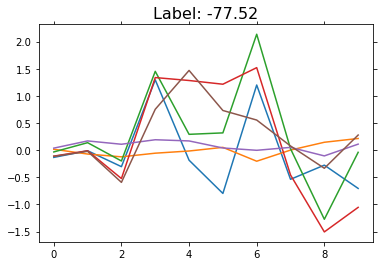

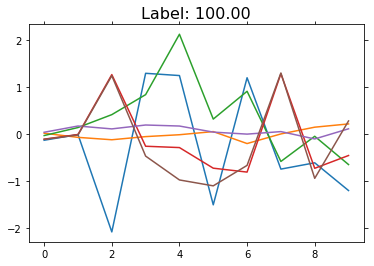

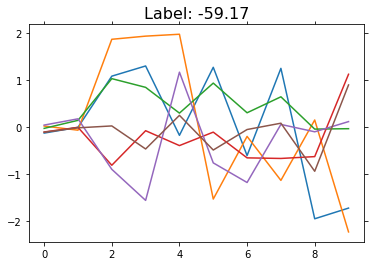

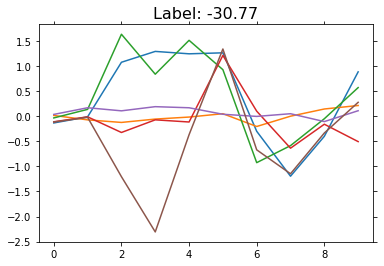

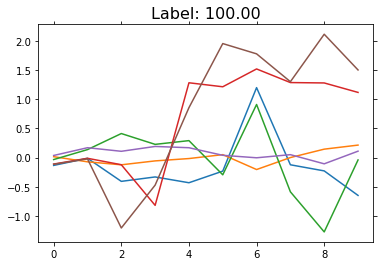

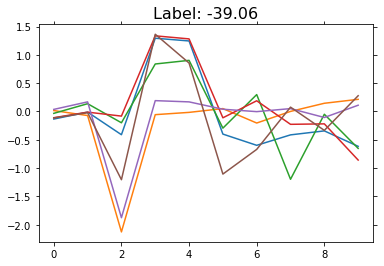

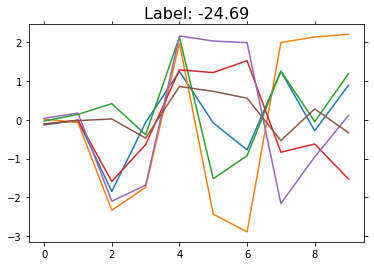

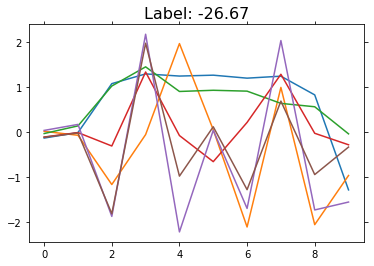

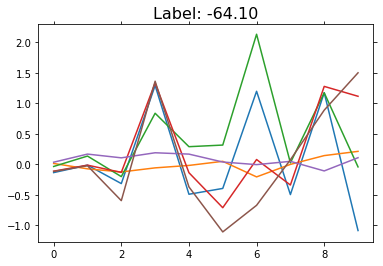

In [ ]:
dloaders.show_batch()

In [ ]:
# ## debug
# ## redefine models to add debug info, models are defined in models!
# class InceptionBlock(nn.Module):
#     def __init__(self,c_in,bottleneck=32,ks=40,nb_filters=32,residual=True,depth=6):

#         super().__init__()

#         self.residual = residual
#         self.depth = depth

#         #inception & residual layers
#         inc_mods = []
#         res_layers = []
#         res = 0
#         for d in range(depth):
#             inc_mods.append(
#                 Inception(c_in if d == 0 else nb_filters * 4, bottleneck=bottleneck if d > 0 else 0,ks=ks,
#                           nb_filters=nb_filters))
#             if self.residual and d % 3 == 2:
#                 res_layers.append(shortcut(c_in if res == 0 else nb_filters * 4, nb_filters * 4))
#                 res += 1
#             else: res_layer = res_layers.append(None)
#         self.inc_mods = nn.ModuleList(inc_mods)
#         self.res_layers = nn.ModuleList(res_layers)
#         self.act = nn.ReLU()
        
#     def forward(self, x):
#         print(f'block dtype {x.dtype}')
#         res = x
#         for d, l in enumerate(range(self.depth)):
#             x = self.inc_mods[d](x)
#             if self.residual and d % 3 == 2:
#                 res = self.res_layers[d](res)
#                 x += res
#                 res = x
#                 x = self.act(x)
#         return x


# class InceptionTime(nn.Module):
#     def __init__(self,c_in,c_out,bottleneck=32,ks=40,nb_filters=32,residual=True,depth=6):
#         super().__init__()
#         self.block = InceptionBlock(c_in,bottleneck=bottleneck,ks=ks,nb_filters=nb_filters,
#                                     residual=residual,depth=depth)
#         self.gap = nn.AdaptiveAvgPool1d(1)
#         self.fc = nn.Linear(nb_filters * 4, c_out)

#     def forward(self, x):
#         print(x.dtype)
# #         x.to(torch.float)
#         x = self.block(x)
# #         print(x.shape)
#         x = self.gap(x).squeeze(-1)
#         x = self.fc(x)
#         return x


# class InceptionTimeSgm(nn.Module):
#     '''
#     add a sigmoid layer to InceptionTime to get the ouput in a certain range
#     '''
    
#     def __init__(self, n_in, n_out):
#         super().__init__()
#         self.mod = nn.Sequential(InceptionTime(n_in, n_out), Sigmoid(-1., 1.))
        
#     def forward(self, x):
#         x = x.float()
#         print(f'InceptionTimeSgm dtype {x.dtype}')
#         return self.mod(x)

In [ ]:
# ### debug
# ## redefine models to add debug info, models are defined in models!
# class ResNetSgm(nn.Module):
#     def __init__(self,c_in, c_out):
#         super().__init__()
#         nf = 64

#         self.block1 = ResBlock(c_in, nf, ks=[7, 5, 3], act_fn='relu')
#         self.block2 = ResBlock(nf, nf * 2, ks=[7, 5, 3], act_fn='relu')
#         self.block3 = ResBlock(nf * 2, nf * 2, ks=[7, 5, 3], act_fn='relu')
#         self.gap = nn.AdaptiveAvgPool1d(1)
#         self.fc = nn.Linear(nf * 2, c_out)
#         self.sig = SigmoidRange(-1,1)

#     def forward(self, x):
#         x = self.block1(x)
#         x = self.block2(x)
#         x = self.block3(x)
#         x = self.gap(x).squeeze(-1)
#         x = self.fc(x)
#         return self.sig(x)

In [ ]:
#cuda
loss_fn = get_loss_fn('leaky_loss', alpha=0.5)

learn = Learner(dloaders, InceptionTimeSgm(6,1), loss_func=loss_fn, metrics=unweighted_profit, wd=0.03)
# learn = Learner(dloaders, InceptionTimeSgm(6,1), loss_func=F.mse_loss, metrics=unweighted_profit, wd=0.03)

In [ ]:
# %reload_ext autoreload
# %autoreload 2

In [ ]:
#cuda
loss_fn = partial(qd_loss, add=True)

learn = Learner(dloaders, InceptionTimeBounds(6,1), loss_func=loss_fn, wd=0.03)
# learn = Learner(dloaders, InceptionTimeSgm(6,1), loss_func=F.mse_loss, metrics=unweighted_profit, wd=0.03)

In [ ]:
qd_loss??

In [ ]:
xb,yb = dloaders.one_batch()

encodes
maskout
dimout


In [ ]:
preds = learn.model(xb)

In [ ]:
loss_fn(xb,yb)

tensor(1162, device='cuda:0') tensor(716.4655, device='cuda:0')
tensor(-0., device='cuda:0') tensor(0.2799, device='cuda:0')


tensor([0.8355], device='cuda:0')

In [ ]:
#cuda
learn.fit_one_cycle(1, lr_max=1e-4)

encodes
cutout
tensor(7208, device='cuda:0') tensor(16002.7285, device='cuda:0')
tensor(0., device='cuda:0', grad_fn=<MulBackward0>) tensor(0.2442, device='cuda:0')


RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.cuda.FloatTensor [256]], which is output 0 of SelectBackward, is at version 1; expected version 0 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).

In [ ]:
#cuda
preds = learn.get_preds(1)

encodes
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
encodes
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
encodes
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
encodes
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32


In [ ]:
#cuda
unweighted_profit(*preds, 0)

tensor(-0.5439)

In [ ]:
#cuda
(preds[0]>0).sum()

tensor(190)

### Discrete Timeseries

Status (5.5.):
- can pass conts and discretes
- separate tensor type_tfms
- batch tfms can be done type specific
- InceptionTimeD takes both tensors, concats them (and converts them to float)
- model training seems to work
ToDo: think about how augmentations should be applied to the discrete parts, e.g. apply them, then round, not apply them at all, define specific behaviour for the discrete augmentations, etc. ...

In [ ]:
#export
def get_discrete_config():
    '''get a simple column configuration for development'''
    x_cols_cont = [[f'x{i}_{j}' for j in range(10)] for i in [0,1,3,4]] 
    x_cols_discrete = [[f'x{i}_{j}' for j in range(10)] for i in [2,5]]
    dep = 'y0'
    n_train = 8000
    
    return x_cols_cont, x_cols_discrete, dep, n_train

In [ ]:
#int
x_cont, x_dis, dep, n_train = get_discrete_config()

In [ ]:
#int
df_main[x_dis[0]] ## still missing values 

,x2_0,x2_1,x2_2,x2_3,x2_4,x2_5,x2_6,x2_7,x2_8,x2_9
0,0.0,1.0,-1.0,-2.0,-1.0,0.0,0.0,0.0,-2.0,1.0
1,0.0,-1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0
2,-1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,-2.0,0.0
3,-2.0,-1.0,2.0,2.0,0.0,3.0,0.0,-2.0,-1.0,0.0
4,-1.0,-2.0,2.0,0.0,-2.0,-1.0,1.0,-2.0,-3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
199995,1.0,0.0,1.0,1.0,-1.0,-3.0,-4.0,0.0,-4.0,1.0
199996,-1.0,0.0,4.0,1.0,-1.0,0.0,1.0,4.0,-1.0,2.0
199997,-2.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,-3.0,-2.0
199998,0.0,1.0,-1.0,0.0,0.0,4.0,0.0,0.0,-1.0,0.0


In [ ]:
#int
items, n_train = df_to_items_discrete(df_main, (x_cont, x_dis), dep, n_train)

(200000, 4, 10) (200000, 2, 10)


In [ ]:
items[0]

(array([[  -7.8431373,  100.       ,   -6.497726 ,  -24.509804 ,
          -33.22259  ,  -42.735043 ,  -55.24862  ,  -56.497173 ,
          -30.674847 ,  100.       ],
        [ 100.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ],
        [ -17.301039 ,  100.       ,  -30.674847 ,  -54.945053 ,
         -227.27272  ,  -27.855154 , -400.       , -147.05882  ,
         -100.       ,  -94.33962  ],
        [   0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ,    0.       ,    0.       ,
            0.       ,    0.       ]], dtype=float32),
 array([[ 0,  1, -1, -2, -1,  0,  0,  0, -2,  1],
        [ 0,  1,  0, -1, -1, -1, -1,  0, -1, -2]]),
 -56.49717514124313)

In [ ]:
#int
def db_int_get_items(df_main):
    return items_to_list(df_to_items_discrete(df_main, [x_cont, x_dis], dep, n_train)[0])

In [ ]:
#int
def get_by_idx(x, idx=0):
#     pv(f'get idx {idx} item {x}', verbose=_verbose)
    return x[idx]

In [ ]:
#int
# db_int_get_items = items
getters = [partial(get_by_idx, idx=i) for i in range(3)]

In [ ]:
#int
class ToTSIntTensor(Transform):
    def encodes(self, x):
        pv('ToTSIntTensor', _verbose)
        return TSIntTensor(x)

In [ ]:
#int
def TSIntBlock():
    return TransformBlock(type_tfms=ToTSIntTensor)

In [ ]:
##int
dblock = DataBlock(blocks = [TSBlock, TSIntBlock, FloatBlock],
    get_items=db_int_get_items, 
                   getters=getters,
                   splitter = FixedSplitter(),
                   n_inp = 2,
                   batch_tfms=RandAugment(tfms=tfms)
                  )

In [ ]:
#cuda
dblock.summary(df_main)

tfms [Zoomin: (TSTensor,object) -> encodes , Zoomout: (TSTensor,object) -> encodes , RandZoom: (TSTensor,object) -> encodes , RandTimesteps: (TSTensor,object) -> encodes , Dimout: (TSTensor,object) -> encodes , Cutout: (TSTensor,object) -> encodes , TimestepZero: (TSTensor,object) -> encodes , Crop: (TSTensor,object) -> encodes , RandomCrop: (TSTensor,object) -> encodes , Maskout: (TSTensor,object) -> encodes , YWarp: (TSTensor,object) -> encodes , YNormal: (TSTensor,object) -> encodes , YScale: (TSTensor,object) -> encodes , TimeWarp: (TSTensor,object) -> encodes , TimeNormal: (TSTensor,object) -> encodes ]
Setting-up type transforms pipelines
0       2009-01-02 19:30:00  2.77   56.497175  109.890110   -7.843137   
1       2009-01-02 19:30:00  2.92   52.083333   98.039216 -161.290323   
2       2009-01-03 11:30:00  2.08   92.592593   92.592593  -50.761421   
3       2009-01-03 11:30:00  4.00   33.333333  117.647059 -129.870130   
4       2009-01-03 13:45:00  1.90  111.111111  113.6363

In [ ]:
dloaders = dblock.dataloaders(df_main, bs=16)

(200000, 4, 10) (200000, 2, 10)


In [ ]:
xc,xd,y = dloaders.one_batch()

dimout


In [ ]:
xc.shape, xd.shape, y.shape

(torch.Size([16, 4, 10]), torch.Size([16, 2, 10]), torch.Size([16, 1]))

In [ ]:
list(map(type, [xc, xd, y]))

[torchtools.data.TSTensor, torchtools.data.TSIntTensor, __main__.TensorFloat]

For using conts and discretes with a model like InceptionTime, it seems best to apply the augmentations seperately, but then concatenate both tensors and feed them as continuous input to the model.
- normalization?
- embeddings or encodings?
- concatenation at model level probably best, similar to tabular models

In [ ]:
dloaders.after_batch

Pipeline: RandAugment

In [ ]:
xc.shape, xd.shape

(torch.Size([16, 4, 10]), torch.Size([16, 2, 10]))

In [ ]:
torch.cat([xc.float(), xd.float()], dim=1).shape

torch.Size([16, 6, 10])

In [ ]:
#export
class InceptionTimeD(nn.Module):
    '''
    add a sigmoid layer to InceptionTime to get the ouput in a certain range
    '''
    
    def __init__(self, n_in, n_out):
        super().__init__()
        self.mod = nn.Sequential(InceptionTime(n_in, n_out), Sigmoid(-1., 1.))
        
    def forward(self, xc, xd):
        x = torch.cat([xc.float(), xd.float()], dim=-2)
        x = x.float()
        print(f'InceptionTimeSgm dtype {x.dtype}')
        return self.mod(x)

In [ ]:
#cuda
learn = Learner(dloaders, InceptionTimeD(6,1), loss_func=loss_fn)

In [ ]:
#cuda
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,time
0,0.123398,-0.020747,00:18


[2 3 4 5 6 7 8 9]
[3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[5 6 7 8 9]
[0 1 2 3 4 5 6]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[2 3 4 5 6 7 8 9]
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
[2 3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[0 1 2 3 4]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
cutout
[1 2 3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[4 5 6 7 8 9]
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[0 1 2 3 4 6 7 9]
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[4 5 6 

cutout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[3 4 5 6 7 8 9]
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[5 6 7 8 9]
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[2 3 4 5 6 7]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

[0 1 2 3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
timestepzero
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[3 4 5 6 7 8 9]
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5]
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[0 1 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
cutout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
crop
[0 1 2 3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[4 5 6 7 8 9]
crop
InceptionTimeSgm dtype torch.

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6 7]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[0 1 2 3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6 7 8 9]
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
randomcrop
[4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
randomcrop
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6 7 8 9]
[0 2 3 4 5 6 7 8]
InceptionTimeSgm dtype torch.flo

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
cutout
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
cutout
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[4 5 6 7 8 9]
InceptionTimeSgm dtype torch

[0 1 2 3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
cutout
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6 7]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
cutout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
randomcrop
[0 1 2 3 5 6 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[0 1 3 4 5 6 7 8]
[1 2 3 4 5 6]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
timestepzero
[1 2 3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[5 6 7 8 9]
maskout
InceptionTimeSgm dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
[0 1 2 3 4 5 6 7 8]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[0 1 2 3 4 5 6 7]
[1 2 3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
cutout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[1 2 3 4 5 6 7 8 9]
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
cutout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
[3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
dimout
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
randomcrop
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
crop
InceptionTimeSgm dtype torch.float32
torch.float32
block d

[4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
maskout
[3 4 5 6 7 8 9]
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
t

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32
InceptionTimeSgm dtype torch.float32
torch.float32
block dtype torch.float32

#### Excursion Mnist

from fastai2.vision.all import *
mnist = DataBlock(blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), 
                  get_items=get_image_files, 
                  splitter=GrandparentSplitter(),
                  get_y=parent_label,
                 batch_tfms=[FooTransform, RandAugment()])

source = untar_data(URLs.MNIST_TINY)
mnist.summary(source)